In [2]:
## import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
loan_history_data = pd.read_csv('loan/loan.csv')

In [4]:
loan_history_data.shape

(39717, 111)

In [5]:
loan_history_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [6]:
## check if the columns carries any null values
loan_history_data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [7]:
# drop the columns that have null values
loan_history_data.dropna(axis=1, inplace=True, how='all')

In [8]:
loan_history_data.shape

(39717, 57)

In [9]:
loan_history_data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,39717.000000,39717.000000,39717.000000,39661.0,39717.0,39717.0,39661.0,39717.0,39020.000000,39678.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,95.221624,12.406112,2678.826162,0.0,1.0,0.0,0.0,0.0,0.043260,0.0
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,688.744771,148.671593,4447.136012,0.0,0.0,0.0,0.0,0.0,0.204324,0.0
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,0.000000,0.000000,218.680000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,0.000000,0.000000,546.140000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,0.000000,0.000000,3293.160000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,29623.350000,7002.190000,36115.200000,0.0,1.0,0.0,0.0,0.0,2.000000,0.0


In [10]:
columns_with_same_value=[]
for column in loan_history_data.columns:
    if loan_history_data[column].nunique()==1:
        columns_with_same_value.append(column)

columns_with_same_value
# 'pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'

['pymnt_plan',
 'initial_list_status',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'tax_liens']

In [11]:
## drop the non unique columns
loan_history_data.drop(columns_with_same_value, axis=1, inplace=True)

In [12]:
loan_history_data[loan_history_data.duplicated()]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies


In [13]:
null_data = loan_history_data[loan_history_data.isnull().any(axis=1)]
columns_with_nulls = loan_history_data.columns[loan_history_data.isnull().any()]
print(columns_with_nulls)

Index(['emp_title', 'emp_length', 'desc', 'title', 'mths_since_last_delinq',
       'mths_since_last_record', 'revol_util', 'last_pymnt_d', 'next_pymnt_d',
       'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')


In [14]:
loan_history_data['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [15]:
# Removing the current inprogress loan status records as these records will not provide any insights
loan_history_data = loan_history_data[loan_history_data['loan_status']!='Current']
loan_history_data.shape

(38577, 48)

In [16]:
loan_history_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 48 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       38577 non-null  int64  
 1   member_id                38577 non-null  int64  
 2   loan_amnt                38577 non-null  int64  
 3   funded_amnt              38577 non-null  int64  
 4   funded_amnt_inv          38577 non-null  float64
 5   term                     38577 non-null  object 
 6   int_rate                 38577 non-null  object 
 7   installment              38577 non-null  float64
 8   grade                    38577 non-null  object 
 9   sub_grade                38577 non-null  object 
 10  emp_title                36191 non-null  object 
 11  emp_length               37544 non-null  object 
 12  home_ownership           38577 non-null  object 
 13  annual_inc               38577 non-null  float64
 14  verification_status      38

In [17]:
# There are only 1033 records with employee lenght as null out of 38577 total values. Impute the null values with mode
loan_history_data.emp_length.fillna(loan_history_data.emp_length.mode()[0], inplace=True)
loan_history_data.emp_length.isna().sum()

0

In [18]:
loan_history_data['emp_length'].unique()

array(['10+ years', '< 1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '1 year', '6 years', '2 years', '7 years'],
      dtype=object)

In [19]:

loan_history_data['emp_length'] = loan_history_data['emp_length'].replace(['10+ years', '9 years', '8 years', '7 years','6 years','5 years','4 years','3 years','2 years','1 year','< 1 year'],
                                                                          ['10','9','8','7','6','5','4','3','2','1','0',])
loan_history_data['emp_length'] = loan_history_data['emp_length'].apply(lambda x: int(x))

loan_history_data['emp_length'].unique()



array([10,  0,  3,  8,  9,  4,  5,  1,  6,  2,  7], dtype=int64)

In [20]:
# loan_history_data['revol_util']
loan_history_data.revol_util
loan_history_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')

### Dropping some the unused columns

In [39]:
drop_unnecessary_cols = ['id','url', 'desc', 'title', 'zip_code','emp_title','last_pymnt_d','member_id','open_acc','out_prncp','out_prncp_inv','pub_rec','revol_util','revol_bal','recoveries','collection_recovery_fee', 'delinq_2yrs','earliest_cr_line','inq_last_6mths','last_credit_pull_d','last_pymnt_amnt']
loan_history_data.drop(drop_unnecessary_cols, axis = 1, inplace = True)

KeyError: "['id', 'url', 'desc', 'title', 'zip_code', 'emp_title', 'last_pymnt_d', 'member_id', 'open_acc', 'out_prncp', 'out_prncp_inv', 'pub_rec', 'revol_util', 'revol_bal', 'recoveries', 'collection_recovery_fee', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'last_credit_pull_d', 'last_pymnt_amnt'] not found in axis"

In [22]:
loan_history_data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti', 'mths_since_last_delinq',
       'mths_since_last_record', 'total_acc', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'next_pymnt_d', 'pub_rec_bankruptcies'],
      dtype='object')

In [23]:
### Convert the interest rate to numberical value
loan_history_data.int_rate = pd.to_numeric(loan_history_data.int_rate.apply(lambda x : x.split('%')[0]))

In [24]:
# Convert term column to int type
loan_history_data.term = loan_history_data.term.apply(lambda x: int(x.replace('months', '').strip()))

In [25]:
for column in loan_history_data.columns:
    missing_values = round(loan_history_data[column].isna().sum() / loan_history_data.shape[0], 2)
    if missing_values >= 0.60:
        loan_history_data.drop(column, axis = 1, inplace = True)
loan_history_data.shape

(38577, 24)

In [26]:
loan_history_data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti', 'total_acc', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'pub_rec_bankruptcies'],
      dtype='object')

In [27]:
### Derive loan issued month and year from issue_d column
issued_month_year = loan_history_data['issue_d'].str.partition("-", True)     
loan_history_data['issued_month'] = issued_month_year[0]
loan_history_data['issued_year'] = '20' + issued_month_year[2]

In [28]:
loan_history_data = loan_history_data[loan_history_data.pub_rec_bankruptcies.notna()]

In [29]:
loan_history_data.isna().sum()

loan_amnt               0
funded_amnt             0
funded_amnt_inv         0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
addr_state              0
dti                     0
total_acc               0
total_pymnt             0
total_pymnt_inv         0
total_rec_prncp         0
total_rec_int           0
total_rec_late_fee      0
pub_rec_bankruptcies    0
issued_month            0
issued_year             0
dtype: int64

In [31]:
def create_boxplot(df: pd.DataFrame, column_name: str, title: str = None) -> None:

    plt.figure(figsize=(3, 3))
    sns.boxplot(y=df[column_name], orient='v')
    if title:
        plt.title(title)

    plt.xlabel(column_name, fontsize=10)
    # plt.ylabel('Values', fontsize=10)
    plt.show()

In [129]:
def create_barplot(data, x: str,y: str, hue: str = None) -> None:

    plt.figure(figsize=(6, 6))
    sns.barplot(data =data,x=x, y=y, hue =hue)
    # plt.xticks(rotation=90)
    plt.show()

In [115]:
def create_countplot(data, x: str, subplot=None) -> None:

    fig,ax = plt.subplots(figsize = (10,10))
    ax.set_yscale('log')
    if subplot:
        plt.subplot(subplot)
    sns.countplot(x=x, data=data)
    plt.show()

### Outliers

In [111]:
first_qauantile = loan_history_data.annual_inc.quantile(0.25)
third_qauantile = loan_history_data.annual_inc.quantile(0.75)
iqr = third_qauantile - first_qauantile
lower_bound = first_qauantile - 1.5 * iqr
upper_bound = third_qauantile + 1.5 * iqr
is_annual_inc_lb = loan_history_data.annual_inc > lower_bound
is_annual_inc_ub = loan_history_data.annual_inc < upper_bound
req_income = is_annual_inc_lb & is_annual_inc_ub

loan_history_data = loan_history_data[req_income]

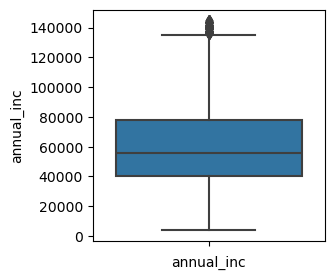

In [112]:
create_boxplot(loan_history_data, 'annual_inc')

## Data Analysis

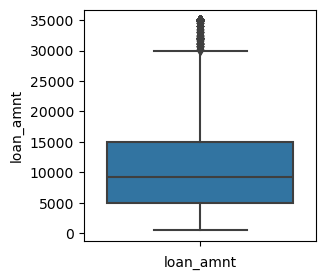

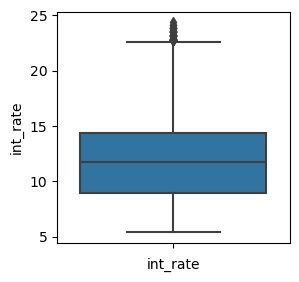

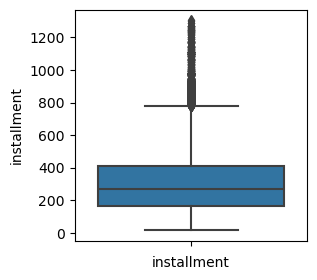

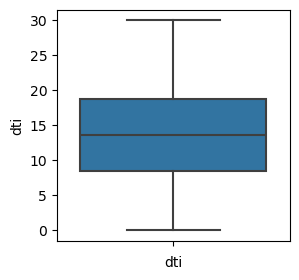

In [113]:
# create_boxplot(loan_history_data, 'funded_amnt')

create_boxplot(loan_history_data, 'loan_amnt')
create_boxplot(loan_history_data, 'int_rate')
create_boxplot(loan_history_data, 'installment')
create_boxplot(loan_history_data, 'dti')

<!-- The fundedamount of most of the loan applicants is in between 5000 and 15000 USD -->
<!-- The fundedamount by investor for most of the loan applicants in between 5000 and 14000 USD -->
 - The loan amount of most of the loan applicants is in between 5000 and 15000 USD
 - The interest rate on the loan is between 8.5% - 14.5%
 - EMI amount on the loan is between 180 - 420
 - The debt to income ratio is between 8 - 18

### Univariant analysis

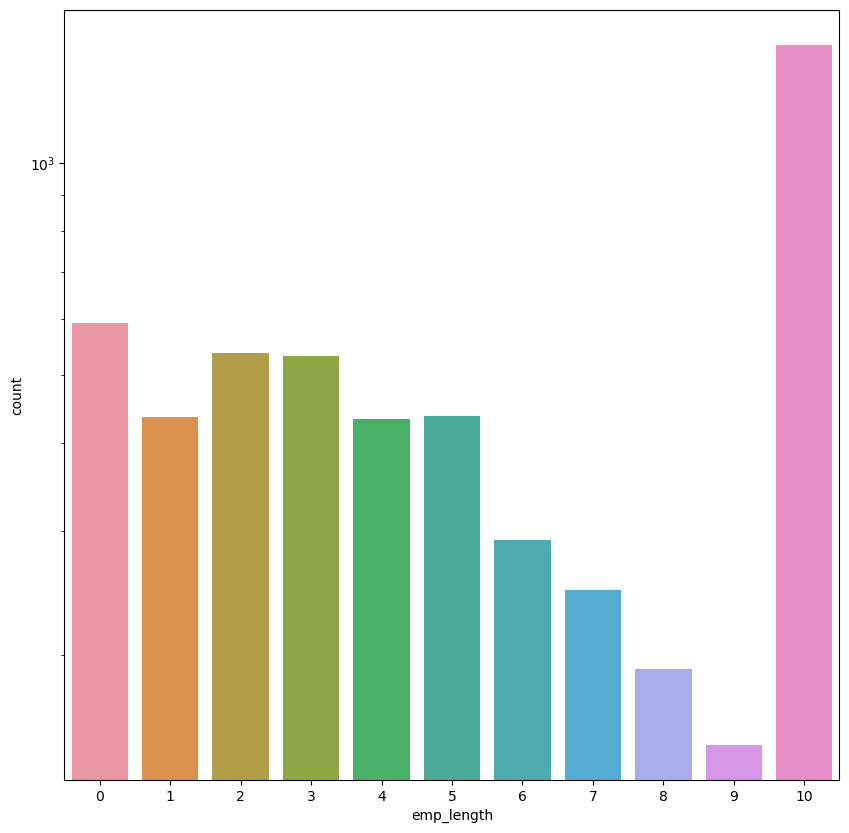

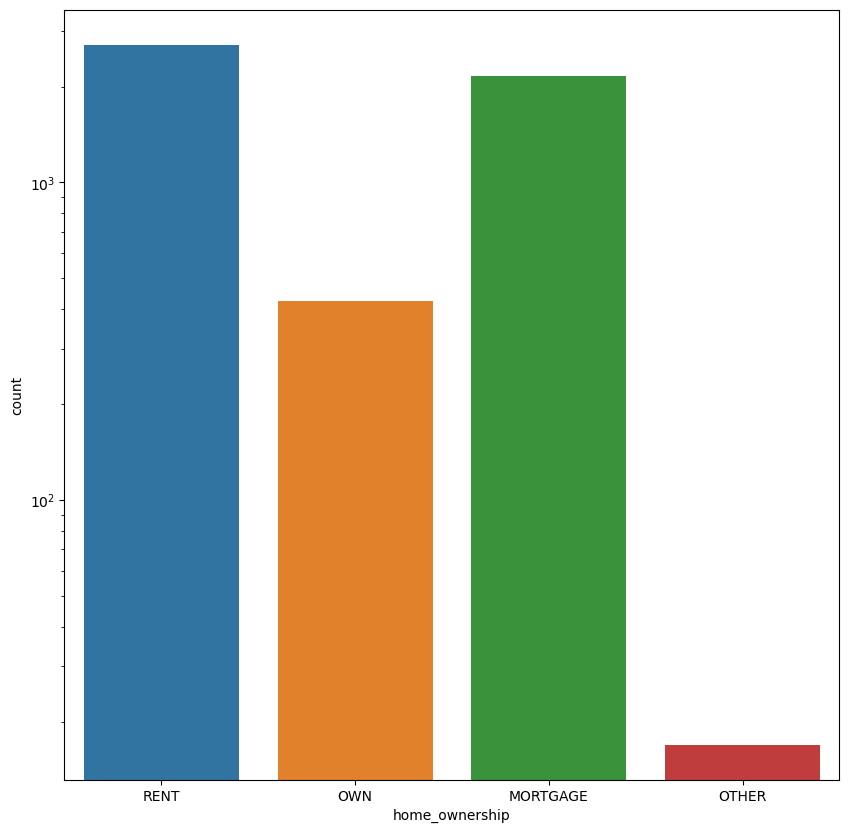

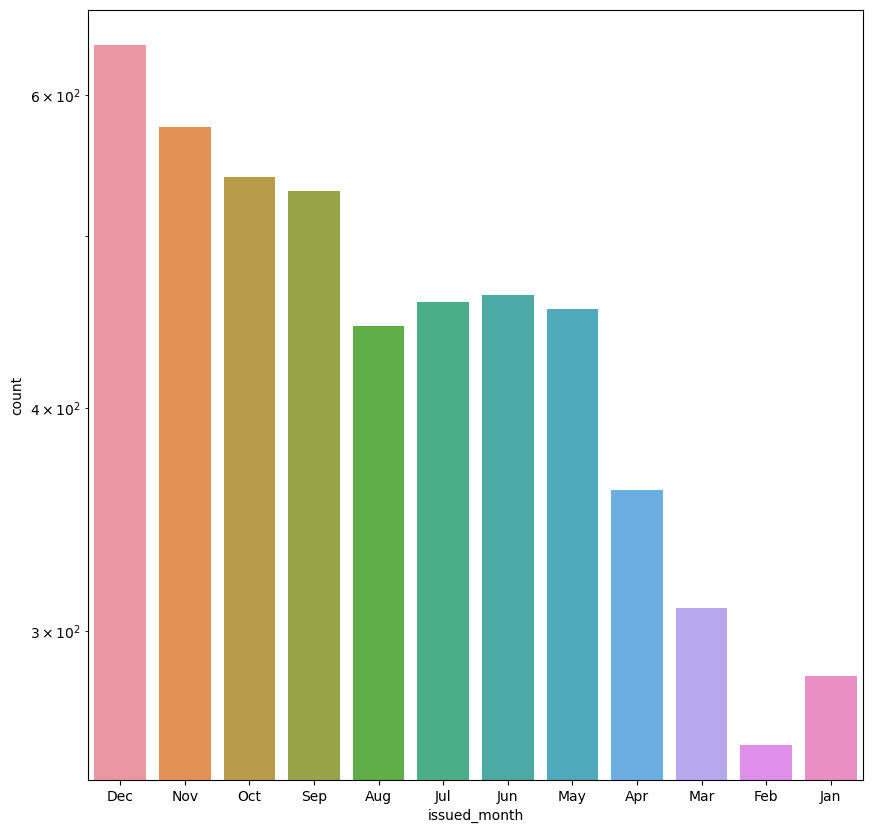

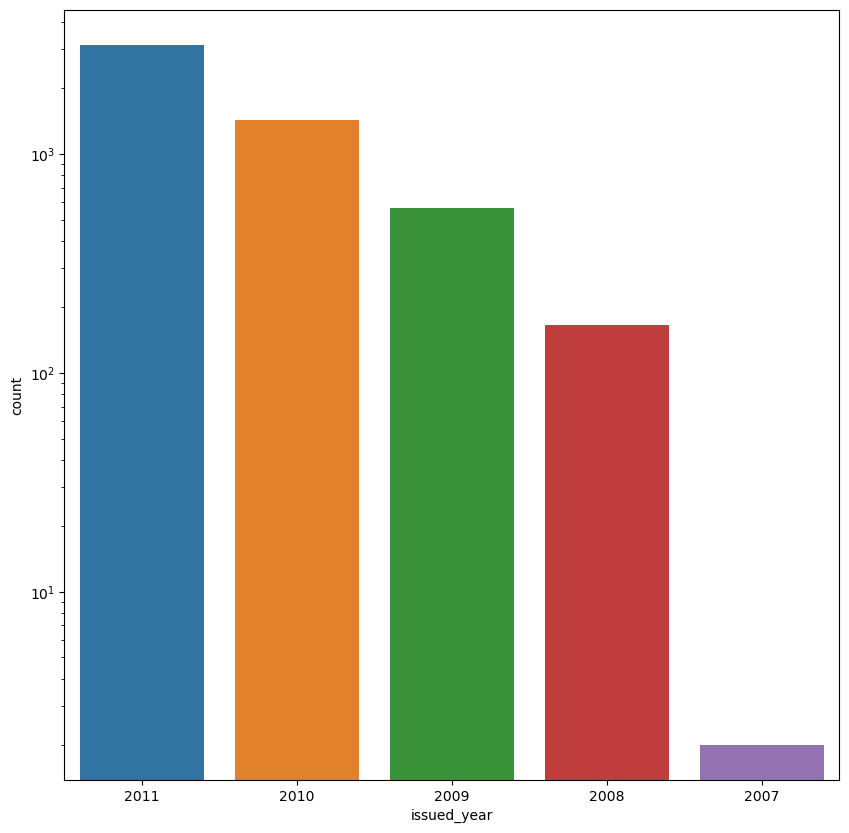

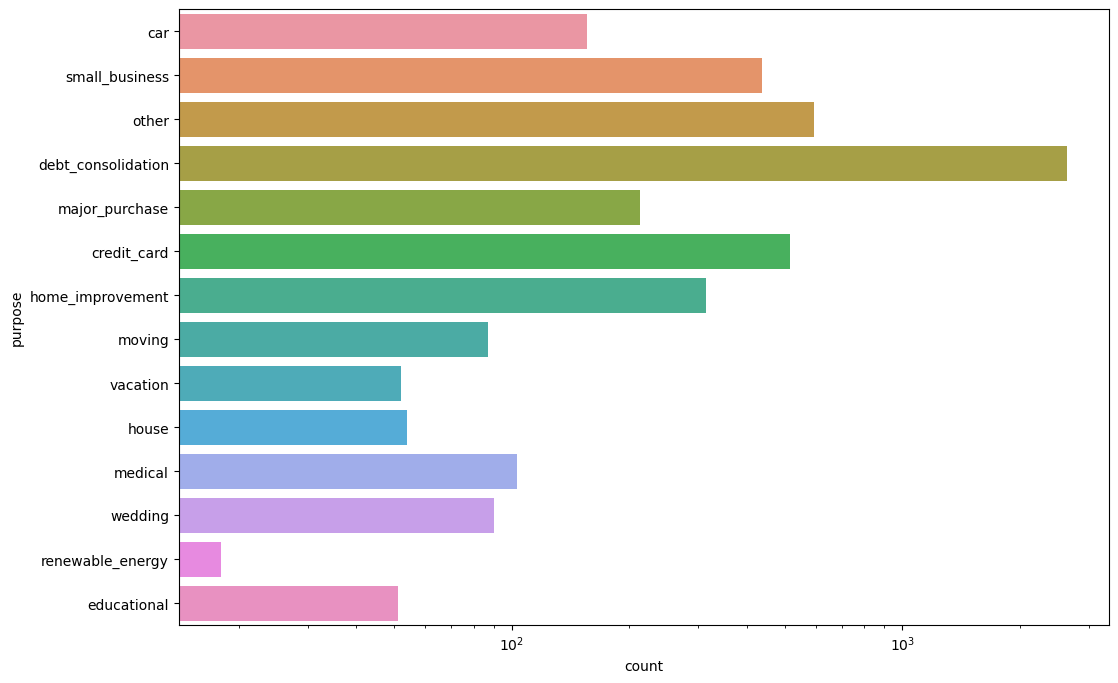

In [116]:
create_countplot(loan_history_data[loan_history_data['loan_status']=='Charged Off'],'emp_length')
create_countplot(loan_history_data[loan_history_data['loan_status']=='Charged Off'],'home_ownership')
create_countplot(loan_history_data[loan_history_data['loan_status']=='Charged Off'],'issued_month')
create_countplot(loan_history_data[loan_history_data['loan_status']=='Charged Off'],'issued_year')

fig, ax = plt.subplots(figsize = (12,8))
ax.set(xscale = 'log')
sns.countplot(y ='purpose', data=loan_history_data[loan_history_data.loan_status == 'Charged Off'])
plt.show()

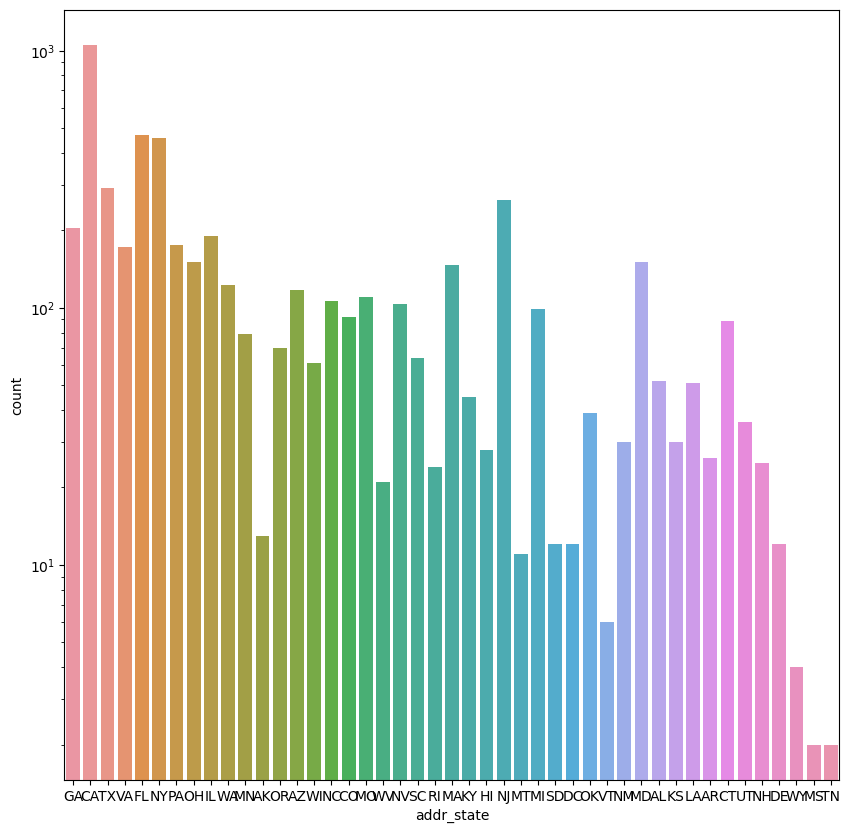

In [136]:
create_countplot(loan_history_data[loan_history_data['loan_status']=='Charged Off'],'addr_state')

### Univariant Segmented analysis

In [118]:
### create buckets for installments, loan amounts, interest rates, dti and funded amount investment group
loan_history_data['loan_amnt_groups'] = pd.cut(loan_history_data['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
loan_history_data['interest_rate_groups'] = pd.cut(loan_history_data['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])
loan_history_data['installment_groups'] = pd.cut(loan_history_data['installment'], bins=10,precision =0,labels=['15-180','180-270','270-420','420-530','530-660','660-800','800-960','960-1000','1000-1160','1160-1350'])
loan_history_data['dti_groups'] = pd.cut(loan_history_data['dti'], bins=5,precision =0,labels=['0-6','6-12','12-18','18-24','24-30'])


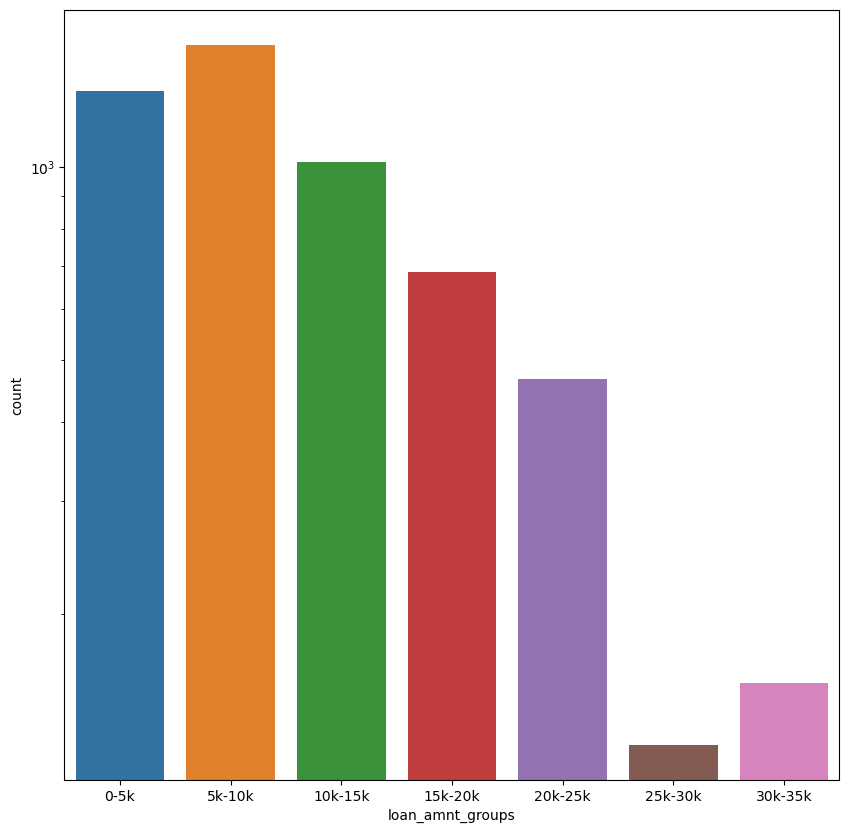

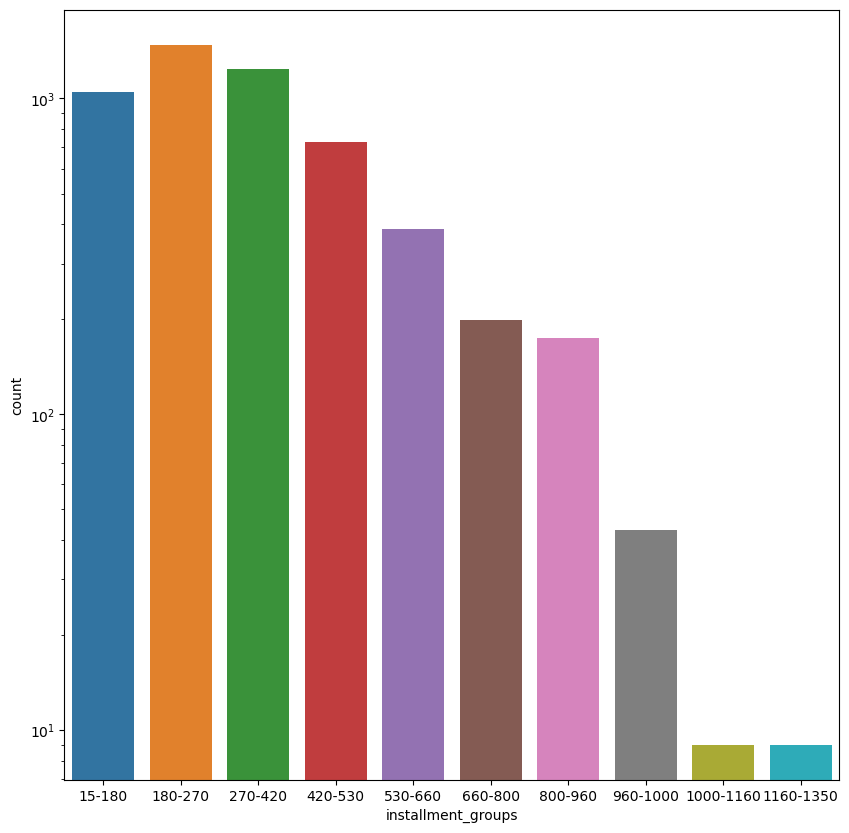

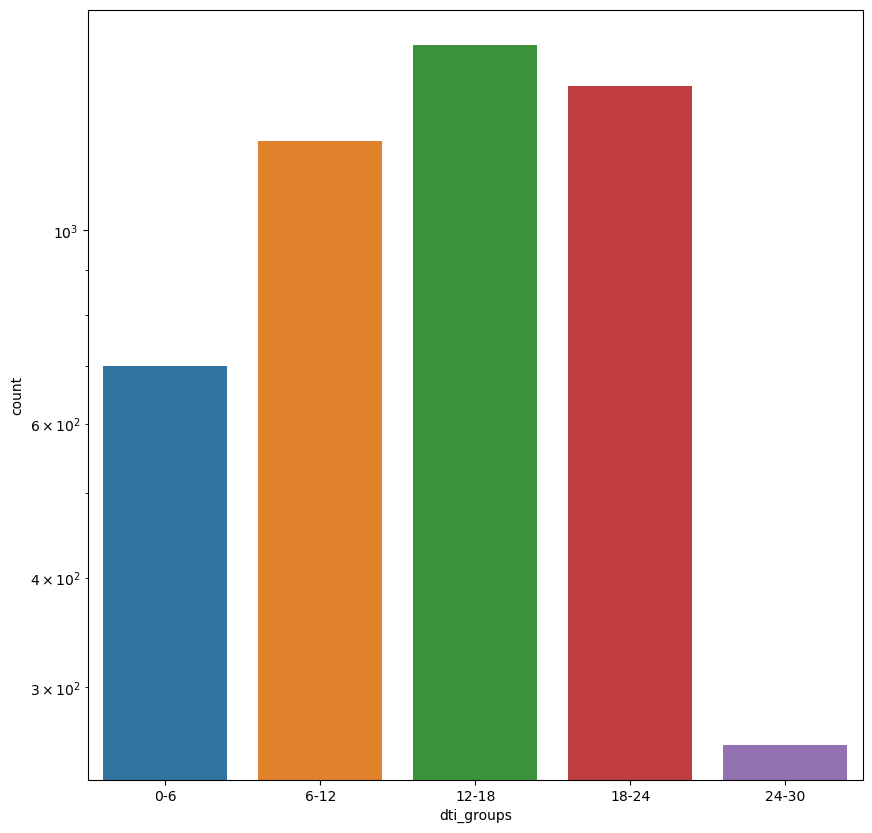

In [119]:
create_countplot(loan_history_data[loan_history_data['loan_status']=='Charged Off'],'loan_amnt_groups')
create_countplot(loan_history_data[loan_history_data['loan_status']=='Charged Off'],'installment_groups')
create_countplot(loan_history_data[loan_history_data['loan_status']=='Charged Off'],'dti_groups')


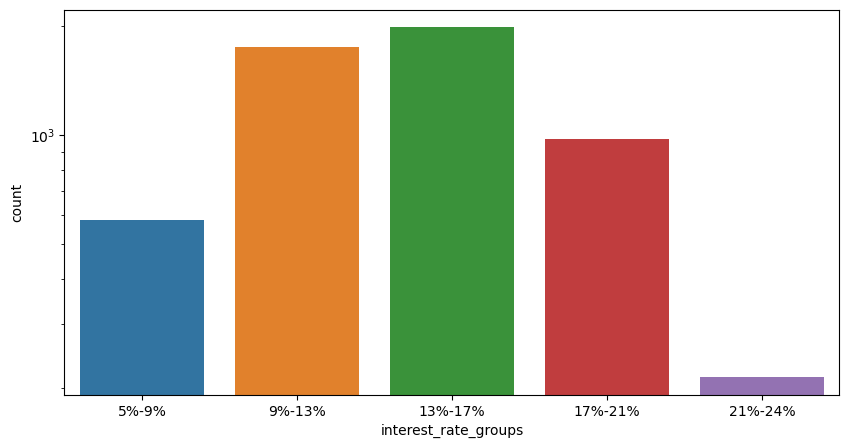

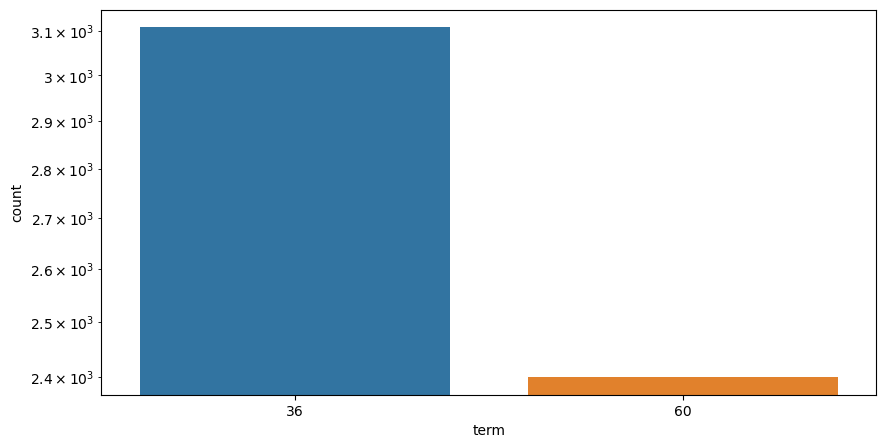

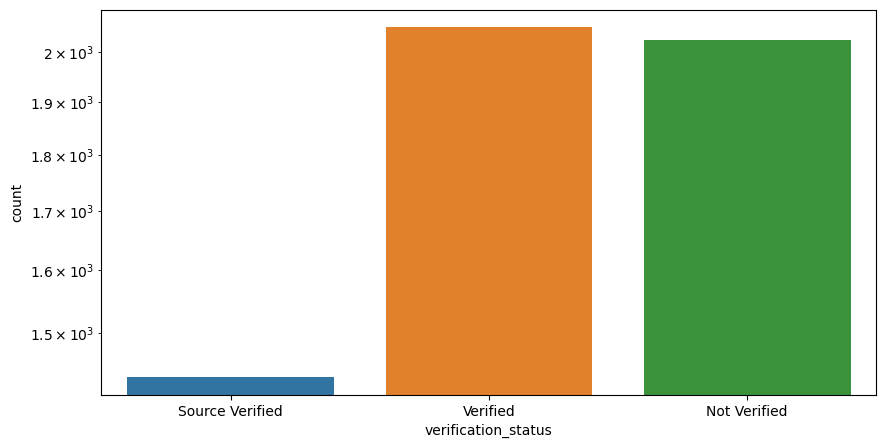

In [43]:
create_countplot(loan_history_data[loan_history_data['loan_status']=='Charged Off'],'interest_rate_groups')
create_countplot(loan_history_data[loan_history_data['loan_status']=='Charged Off'],'term')
create_countplot(loan_history_data[loan_history_data['loan_status']=='Charged Off'],'verification_status')


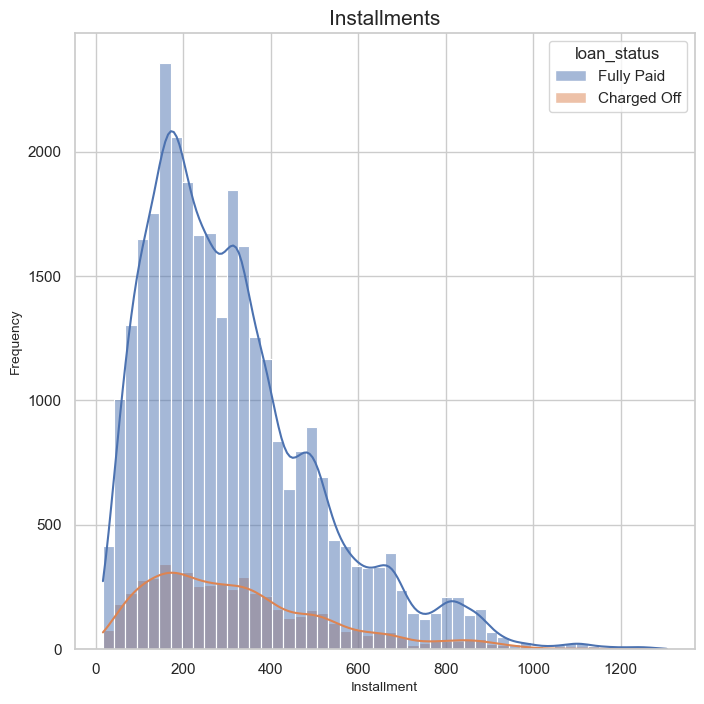

In [149]:
sns.set(style="whitegrid")
# Create the histogram
plt.figure(figsize=(8,8))
sns.histplot(data=loan_history_data, x='installment',hue='loan_status', bins=50, kde=True)
plt.title("Installments", fontsize=15)
plt.xlabel('Installment', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.show()

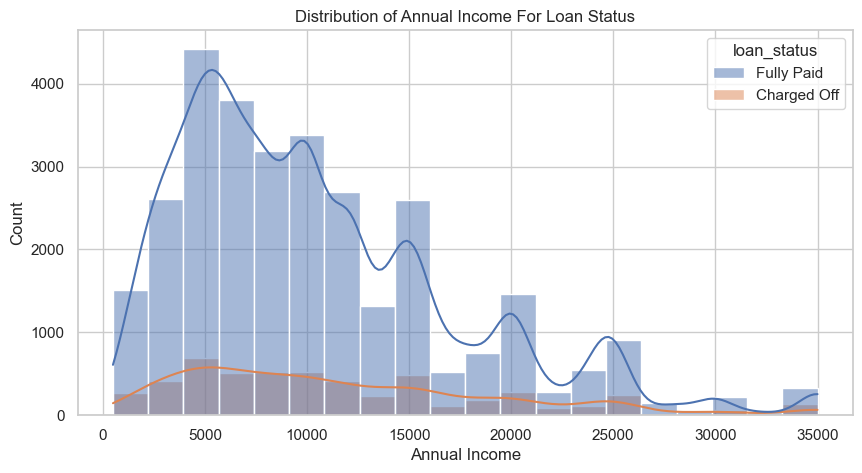

In [148]:
# Distribution of annual_inc based on loan_status
plt.figure(figsize=(10,5))
sns.histplot(data=loan_history_data,x='loan_amnt',hue='loan_status',bins=20,kde=True)
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.title('Distribution of Annual Income For Loan Status',fontsize=12)
plt.show()

### Bivariant Analsys
#### Bivariant Analsys - Loan Amount vs purpose, home ownership, grade

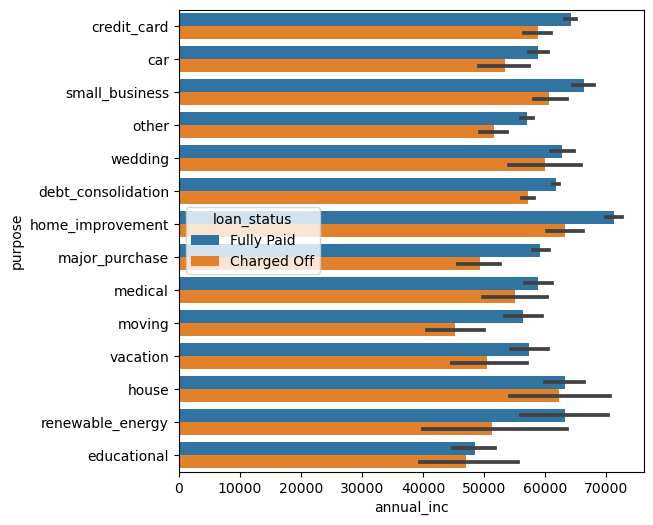

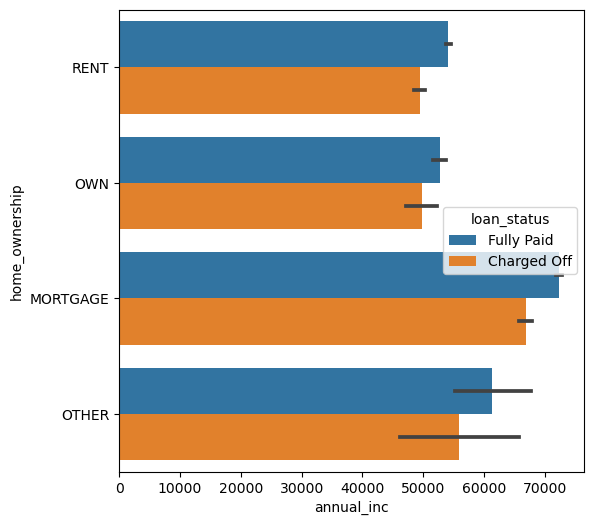

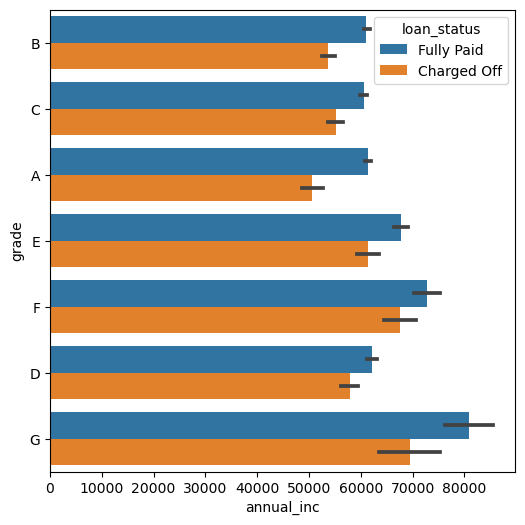

In [133]:
create_barplot(loan_history_data,'annual_inc','purpose','loan_status')
create_barplot(loan_history_data,'annual_inc','home_ownership','loan_status')
create_barplot(loan_history_data,'annual_inc','grade','loan_status')

#### Bivariant Analsys - Loan Amount vs purpose, home ownership, grade

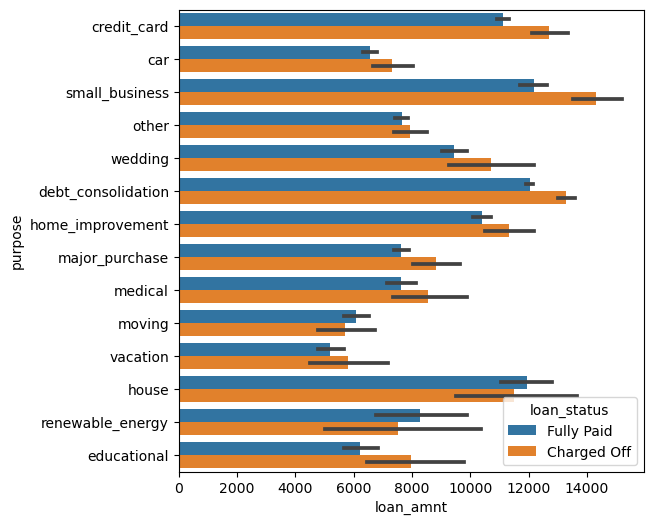

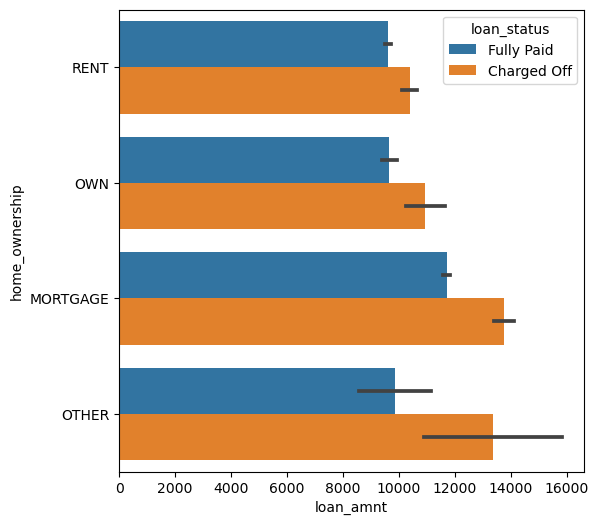

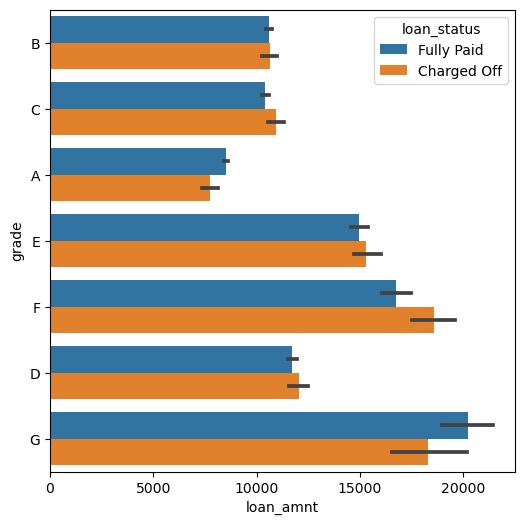

In [131]:
create_barplot(loan_history_data,'loan_amnt','purpose','loan_status')
create_barplot(loan_history_data,'loan_amnt','home_ownership','loan_status')
create_barplot(loan_history_data,'loan_amnt','grade','loan_status')

### Bivariant Segmented Analsys

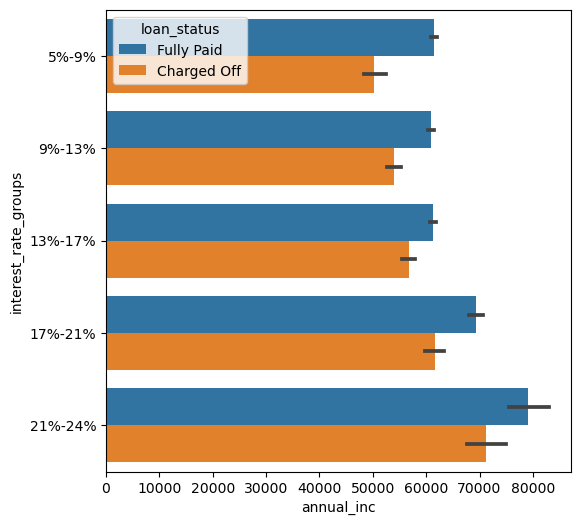

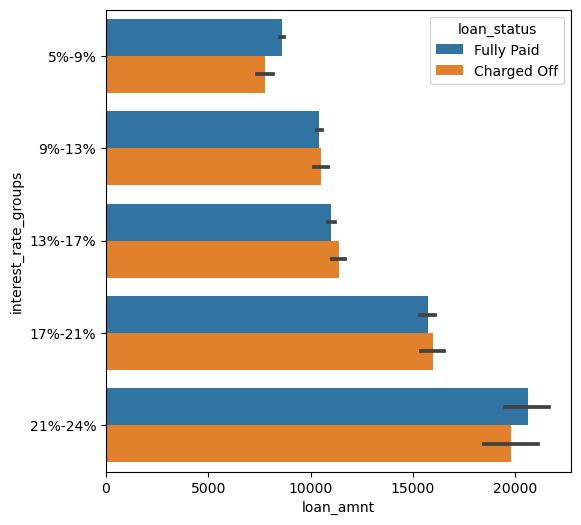

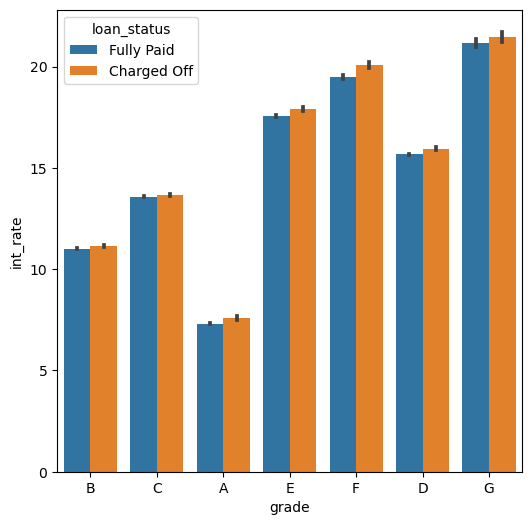

In [135]:
create_barplot(loan_history_data,'annual_inc','interest_rate_groups','loan_status')
create_barplot(loan_history_data,'loan_amnt','interest_rate_groups','loan_status')
create_barplot(loan_history_data,'grade','int_rate','loan_status')

In [153]:
loan_history_data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti', 'total_acc', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'pub_rec_bankruptcies', 'issued_month',
       'issued_year', 'loan_amnt_groups', 'interest_rate_groups',
       'installment_groups', 'dti_groups', 'funded_amnt_inv_group'],
      dtype='object')

In [159]:
correlation_df = loan_history_data[['loan_amnt',  'term', 'int_rate','dti',
       'installment', 'emp_length', 'pub_rec_bankruptcies','annual_inc']]


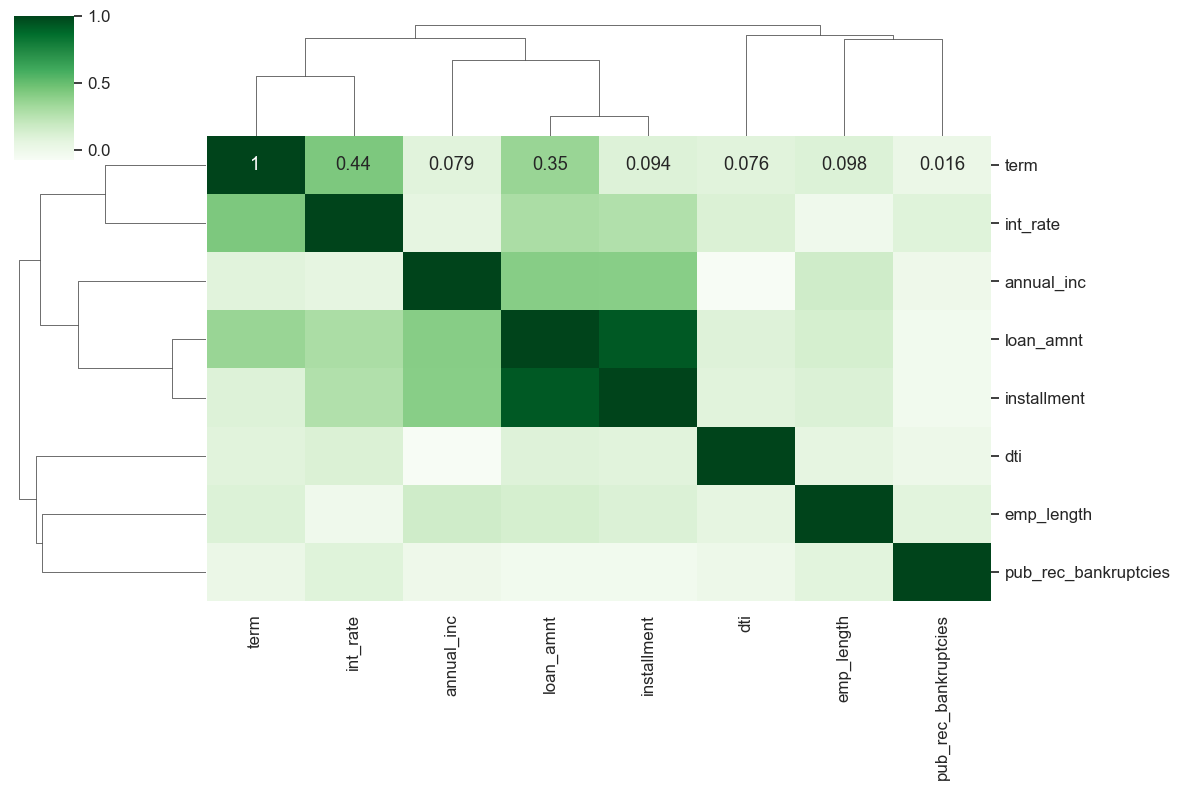

In [160]:
corr = correlation_df.corr()
sns.set(font_scale=1.1)

sns.clustermap(corr, annot=True, figsize=(12, 8), cmap="Greens")
plt.show()

# Inferences from Correlation Metrics

- installment and loam amount has a strong correlation
- 
term and interest rate has strong correlatio
- 
annual income and loan amount has a strong correlati
- n
dti has weak correlation with other fie
- ds
dti and annual income has negative corela
- ion
emp_length has weak correlation with other f
- elds
pub_rec_bankrupticies has weak correlation with  every fielddint